Import libraries

In [4]:
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

Import training data

In [54]:
train_data = pd.read_csv("/content/drive/MyDrive/Sentiment_Analysis_Files/train.csv", encoding='latin1')
train_data.head()

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26


Import testing data

In [55]:
test_data = pd.read_csv("/content/drive/MyDrive/Sentiment_Analysis_Files/test.csv", encoding='latin1')
test_data.head()

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive,noon,21-30,Albania,2877797.0,27400.0,105.0
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative,night,31-45,Algeria,43851044.0,2381740.0,18.0
3,01082688c6,happy bday!,positive,morning,46-60,Andorra,77265.0,470.0,164.0
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive,noon,60-70,Angola,32866272.0,1246700.0,26.0


EDA (Exploratory data analysis)

In [56]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   textID            27481 non-null  object 
 1   text              27480 non-null  object 
 2   selected_text     27480 non-null  object 
 3   sentiment         27481 non-null  object 
 4   Time of Tweet     27481 non-null  object 
 5   Age of User       27481 non-null  object 
 6   Country           27481 non-null  object 
 7   Population -2020  27481 non-null  int64  
 8   Land Area (Km²)   27481 non-null  float64
 9   Density (P/Km²)   27481 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 2.1+ MB


In [57]:
train_data.isnull().sum()

,0
textID,0
text,1
selected_text,1
sentiment,0
Time of Tweet,0
Age of User,0
Country,0
Population -2020,0
Land Area (Km²),0
Density (P/Km²),0


In [58]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4815 entries, 0 to 4814
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   textID            3534 non-null   object 
 1   text              3534 non-null   object 
 2   sentiment         3534 non-null   object 
 3   Time of Tweet     3534 non-null   object 
 4   Age of User       3534 non-null   object 
 5   Country           3534 non-null   object 
 6   Population -2020  3534 non-null   float64
 7   Land Area (Km²)   3534 non-null   float64
 8   Density (P/Km²)   3534 non-null   float64
dtypes: float64(3), object(6)
memory usage: 338.7+ KB


In [59]:
test_data.isnull().sum()

,0
textID,1281
text,1281
sentiment,1281
Time of Tweet,1281
Age of User,1281
Country,1281
Population -2020,1281
Land Area (Km²),1281
Density (P/Km²),1281


In [91]:
df = train_data[['text','sentiment']]
df

,text,sentiment
0,"I`d have responded, if I were going",neutral
1,Sooo SAD I will miss you here in San Diego!!!,negative
2,my boss is bullying me...,negative
3,what interview! leave me alone,negative
4,"Sons of ****, why couldn`t they put them on t...",negative
...,...,...
27476,wish we could come see u on Denver husband l...,negative
27477,I`ve wondered about rake to. The client has ...,negative
27478,Yay good for both of you. Enjoy the break - y...,positive
27479,But it was worth it ****.,positive


In [92]:
df2 = test_data[['text','sentiment']]
df2

,text,sentiment
0,Last session of the day http://twitpic.com/67ezh,neutral
1,Shanghai is also really exciting (precisely -...,positive
2,"Recession hit Veronique Branquinho, she has to...",negative
3,happy bday!,positive
4,http://twitpic.com/4w75p - I like it!!,positive
...,...,...
4810,NaN,NaN
4811,NaN,NaN
4812,NaN,NaN
4813,NaN,NaN


Data Preprocessing

In [94]:
df = df.dropna(subset=['text','sentiment'])
df['text'] = df['text'].astype(str).str.lower()
df['text'] = df['text'].str.replace(r'[^a-z\s]', '', regex=True)
df

/tmp/ipython-input-1215977414.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].astype(str).str.lower()
/tmp/ipython-input-1215977414.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].str.replace(r'[^a-z\s]', '', regex=True)


,text,sentiment
0,id have responded if i were going,neutral
1,sooo sad i will miss you here in san diego,negative
2,my boss is bullying me,negative
3,what interview leave me alone,negative
4,sons of why couldnt they put them on the rel...,negative
...,...,...
27476,wish we could come see u on denver husband l...,negative
27477,ive wondered about rake to the client has ma...,negative
27478,yay good for both of you enjoy the break you...,positive
27479,but it was worth it,positive


In [96]:
df2 = df2.dropna(subset=['text','sentiment'])
df2['text'] = df2['text'].astype(str).str.lower()
df2['text'] = df2['text'].str.replace(r'[^a-z\s]', '', regex=True)
df2

,text,sentiment
0,last session of the day httptwitpiccomezh,neutral
1,shanghai is also really exciting precisely s...,positive
2,recession hit veronique branquinho she has to ...,negative
3,happy bday,positive
4,httptwitpiccomwp i like it,positive
...,...,...
3529,its at am im very tired but i cant sleep but...,negative
3530,all alone in this old house again thanks for ...,positive
3531,i know what you mean my little dog is sinking...,negative
3532,sutra what is your next youtube video gonna be...,positive


Model Training

In [99]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from scipy.sparse import hstack

# --- Prepare training data ---
X_train_text = df['text']
X_test_text = df2['text']

# TF-IDF vectorization for text
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train_text)
X_test_vec = vectorizer.transform(X_test_text)

# Combine TF-IDF features with numeric features
X_train_final = X_train_vec
X_test_final = X_test_vec

# Target
y_train = df['sentiment']
y_test = df2['sentiment']

# --- Train model ---
model = LogisticRegression(max_iter=1000)
model.fit(X_train_final, y_train)

# --- Predict and evaluate ---
y_pred = model.predict(X_test_final)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.7026032823995473
              precision    recall  f1-score   support

    negative       0.72      0.63      0.67      1001
     neutral       0.63      0.76      0.69      1430
    positive       0.81      0.70      0.75      1103

    accuracy                           0.70      3534
   macro avg       0.72      0.70      0.70      3534
weighted avg       0.71      0.70      0.70      3534



In [100]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 630  338   33]
 [ 197 1080  153]
 [  43  287  773]]


Heatmap

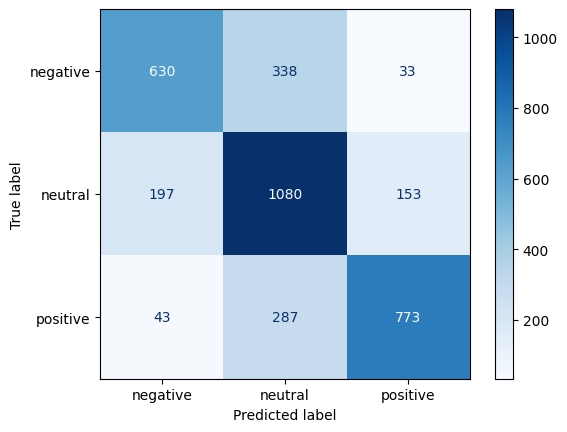

In [101]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=sorted(set(y_test)))
disp.plot(cmap='Blues')

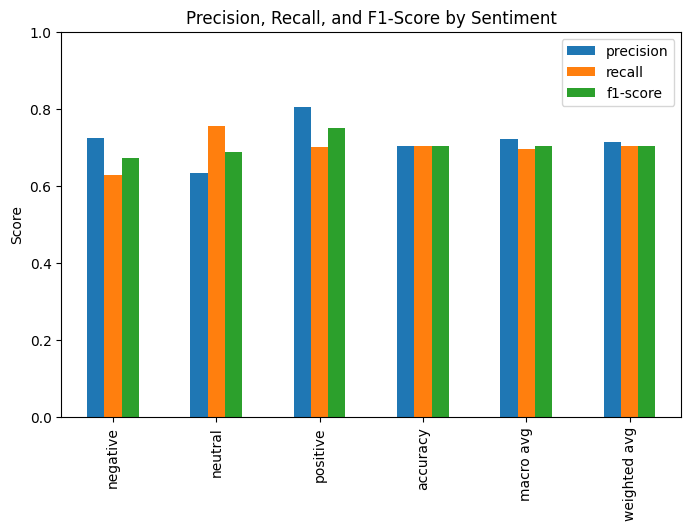

In [102]:
from sklearn.metrics import classification_report
import pandas as pd

report = classification_report(y_test, y_pred, target_names=['negative', 'neutral', 'positive'], output_dict=True)
df_report = pd.DataFrame(report).transpose()

df_report[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(8,5))
plt.title("Precision, Recall, and F1-Score by Sentiment")
plt.ylabel("Score")
plt.ylim(0,1)
plt.show()

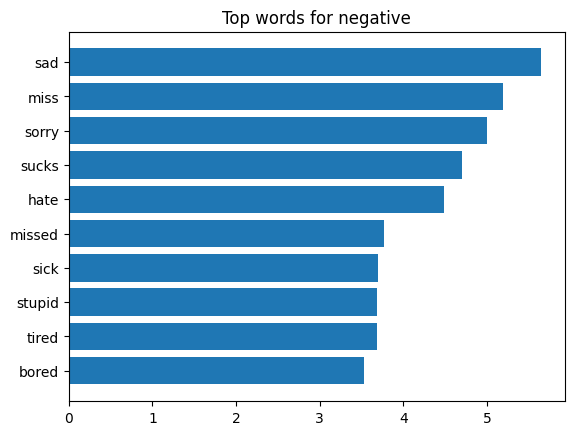

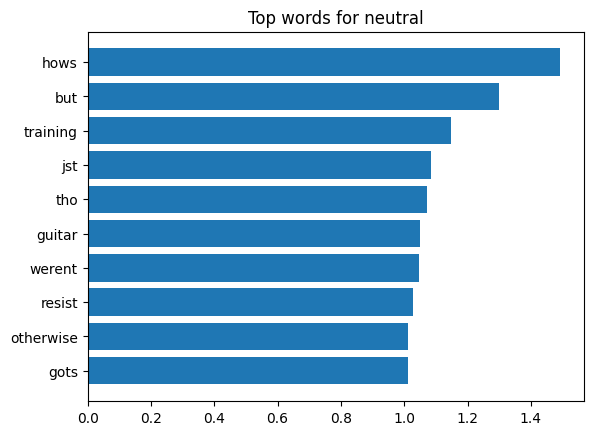

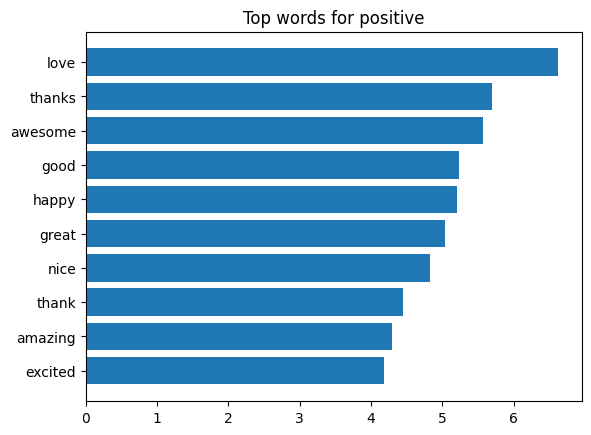

In [103]:
import numpy as np

feature_names = np.array(vectorizer.get_feature_names_out())
for i, label in enumerate(['negative', 'neutral', 'positive']):
    top10 = np.argsort(model.coef_[i])[-10:]
    plt.barh(feature_names[top10], model.coef_[i][top10])
    plt.title(f"Top words for {label}")
    plt.show()


Testing

In [107]:
new_text = ["This product is ruined!"]
new_text_vec = vectorizer.transform(new_text)
predicted_sentiment = model.predict(new_text_vec)
print(predicted_sentiment)


['negative']
